In [3]:
import pandas as pd

In [8]:
#Read the data from www 
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#Display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [11]:
data.shape

(200, 4)

In [14]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

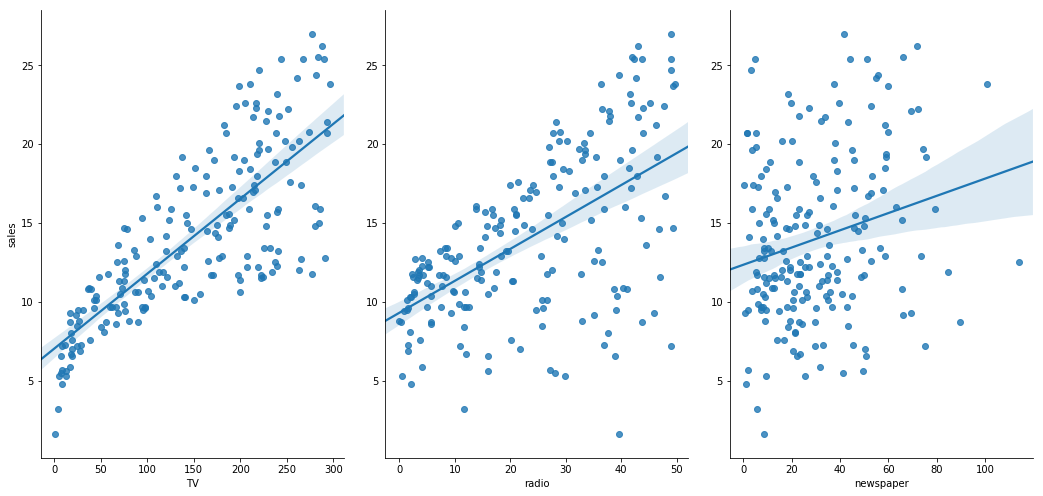

In [20]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [21]:
feature_cols = ['TV', 'radio', 'newspaper']

X = data[feature_cols]

X.head()


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
y = data['sales']
#or
#y = data.sales

y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
X_train.shape




(50,)

In [28]:
X_test.shape 

(50, 3)

In [29]:
y_train.shape

(150,)

In [30]:
y_test.shape

(50,)

In [31]:
#import model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [41]:
for i in range(len(feature_cols)):
    print((feature_cols[i], linreg.coef_[i]))

('TV', 0.046564567874150281)
('radio', 0.17915812245088836)
('newspaper', 0.0034504647111804347)


In [42]:
y_pred = linreg.predict(X_test)

In [46]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303
